Importing

In [1]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
from torchvision.datasets import Flowers102
import random
import numpy as np
import pandas as pd

Download Flowers102

In [2]:
flowers = Flowers102(
    root = './data/',
    split = 'train',
    transform=None,
    download = True
)

0.5%

57.3%


KeyboardInterrupt: 

Load files and labels

In [20]:
path = './data/flowers-102/'
imagepath = os.path.join(path,'jpg')

files = os.listdir(imagepath)
labels = scipy.io.loadmat(os.path.join(path,'imagelabels.mat'))
labels = labels['labels'][0].tolist()

View class distributions

(array([45., 21., 15.,  8.,  4.,  3.,  2.,  2.,  0.,  2.]),
 array([ 40. ,  61.8,  83.6, 105.4, 127.2, 149. , 170.8, 192.6, 214.4,
        236.2, 258. ]),
 <BarContainer object of 10 artists>)

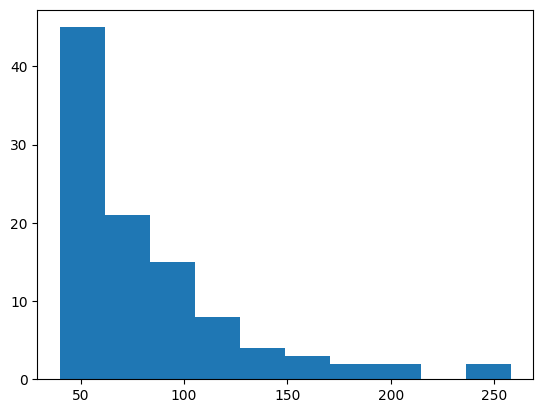

In [21]:
class_distribution = dict()
for i in labels:
    if i in class_distribution:
        class_distribution[i] += 1
    else:
        class_distribution[i] = 1

num_classes = len(class_distribution.keys())
plt.hist(class_distribution.values())

Making data list

In [22]:
data = []
for file, label in zip(files, labels):
    data.append([file,label])

Making in-out split

In [23]:
out_number = 10 #10 classes out-of-set
#out_classes = list(random.sample(range(0,num_classes),out_number)) #randomly select

out_classes = list(range(num_classes-out_number+1,num_classes+1))

out_set = []
in_set = []

for X, y in data:
    if y in out_classes:
        out_set.append([X,y])
    else: 
        in_set.append([X,y])


In [32]:
out_classes

[93, 94, 95, 96, 97, 98, 99, 100, 101, 102]

Making train/val/test split from in-set

In [25]:
split = [0.1, 0.1] # fractional size of val/test splits
random.shuffle(in_set)

val, test, train = (np.split(in_set, [int(split[0]*len(in_set)), int((split[0]+ split[1])*len(in_set))] ))

Making test set binary in (1) vs out (0)

In [30]:
test[:,1] = 1
out_set = np.array(out_set)
out_set[:,1] = 0

test = np.concatenate((test, out_set),axis=0)

Export all as csv

In [31]:
np.savetxt("./datasets/flowers_train.csv", 
           train,
           delimiter =", ", 
           fmt ='% s')

np.savetxt("./datasets/flowers_test.csv", 
           test,
           delimiter =", ", 
           fmt ='% s')

np.savetxt("./datasets/flowers_val.csv", 
           val,
           delimiter =", ", 
           fmt ='% s')
